## 1. 데이터 로딩 및 전처리

### 1.1 train data 생성

In [1]:
import pandas as pd

estate_price_2016 = pd.read_csv('projectDataset/main data from seoul/estate_price_2016.csv', encoding='cp949')
estate_price_2017 = pd.read_csv('projectDataset/main data from seoul/estate_price_2017.csv', encoding='cp949')
estate_price_2018 = pd.read_csv('projectDataset/main data from seoul/estate_price_2018.csv', encoding='cp949')
estate_price_2019 = pd.read_csv('projectDataset/main data from seoul/estate_price_2019.csv', encoding='cp949')
estate_price_2020 = pd.read_csv('projectDataset/main data from seoul/estate_price_2020.csv', encoding='cp949')
estate_price_2021 = pd.read_csv('projectDataset/main data from seoul/estate_price_2021.csv', encoding='cp949')

In [2]:
train_data = pd.concat([estate_price_2018, estate_price_2019, estate_price_2020])
train_data

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201801,3,"130,000",4,1987,언주로 3,NaN,-,-
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201801,8,"117,000",2,1987,언주로 3,NaN,-,-
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201801,11,"130,000",1,1987,언주로 3,NaN,-,-
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201803,19,"139,500",2,1987,언주로 3,NaN,-,-
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,54.98,201804,5,"107,500",5,1987,언주로 3,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84234,서울특별시 중랑구 중화동,274-77,274.0,77.0,한영(104),67.57,202008,7,"26,000",2,2003,동일로144길 74,NaN,-,-
84235,서울특별시 중랑구 중화동,11,11.0,0.0,현대휴앤미,95.94,202007,10,"44,000",6,2007,봉화산로27가길 23,NaN,-,-
84236,서울특별시 중랑구 중화동,11,11.0,0.0,현대휴앤미,100.17,202012,3,"54,800",5,2007,봉화산로27가길 23,NaN,-,-
84237,서울특별시 중랑구 중화동,11월 07일,11.0,7.0,현대휴앤미(102동),77.71,202009,28,"40,000",5,2007,봉화산로27가길 19,NaN,-,-


In [3]:
# train data 생성 위한 전처리 수행

train_data.drop(['해제사유발생일', '거래유형', '중개사소재지'], inplace=True, axis=1)
train_data.drop(['번지', '본번', '부번', '계약일'], inplace=True, axis=1)
# train_data.to_csv('projectDataset/main data from seoul/train_data.csv', index=False, encoding='utf-8-sig')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240921 entries, 0 to 84238
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       240921 non-null  object 
 1   단지명       240921 non-null  object 
 2   전용면적(㎡)   240921 non-null  float64
 3   계약년월      240921 non-null  int64  
 4   거래금액(만원)  240921 non-null  object 
 5   층         240921 non-null  int64  
 6   건축년도      240921 non-null  int64  
 7   도로명       240921 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 16.5+ MB


In [5]:
train_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,"130,000",4,1987,언주로 3
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,"117,000",2,1987,언주로 3
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,"130,000",1,1987,언주로 3
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,"139,500",2,1987,언주로 3
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,"107,500",5,1987,언주로 3
...,...,...,...,...,...,...,...,...
84234,서울특별시 중랑구 중화동,한영(104),67.57,202008,"26,000",2,2003,동일로144길 74
84235,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,"44,000",6,2007,봉화산로27가길 23
84236,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,"54,800",5,2007,봉화산로27가길 23
84237,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,"40,000",5,2007,봉화산로27가길 19


### 1.2 각 컬럼별 데이터 전처리

In [6]:
# 단지명 컬럼에 대한 탐색 및 전처리 수행
import numpy as np

# 각 컬럼 별 결측치 파악
np.sum(pd.isnull(train_data))

시군구         0
단지명         0
전용면적(㎡)     0
계약년월        0
거래금액(만원)    0
층           0
건축년도        0
도로명         0
dtype: int64

In [7]:
# 단지 별 아파트 데이터 탐색
train_data_by_danji = train_data.groupby(train_data['단지명'])

# 아파트 실거래가 컬럼 숫자형 변환 => 단지 별 아파트 데이터 탐색에 실거래가 포함 위함
train_data['거래금액(만원)'] = train_data['거래금액(만원)'].apply(lambda x: x.replace(',', '')).astype('int64')

# 단지 별 거래금액(만원) 평균 가격(2018~2020)
train_data_by_danji = train_data_by_danji.mean()

In [8]:
train_data_by_danji

,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
단지명,,,,,
(1-102),29.985000,201905.000000,8125.000000,3.500000,1997.0
(1101-1),14.168571,201911.523810,11892.023810,6.595238,2012.0
(13-21),66.510000,201803.666667,38666.666667,4.000000,2006.0
(1546-0),29.350000,201910.000000,22900.000000,9.000000,2015.0
(1617-21),82.340000,201806.000000,66500.000000,5.000000,2007.0
...,...,...,...,...,...
힐튼빌리지1차,82.350000,202005.000000,63000.000000,1.000000,2002.0
힐튼빌리지2차,140.720000,201907.333333,81500.000000,3.333333,2002.0
힐하우스,163.980000,202010.000000,118000.000000,6.000000,1998.0


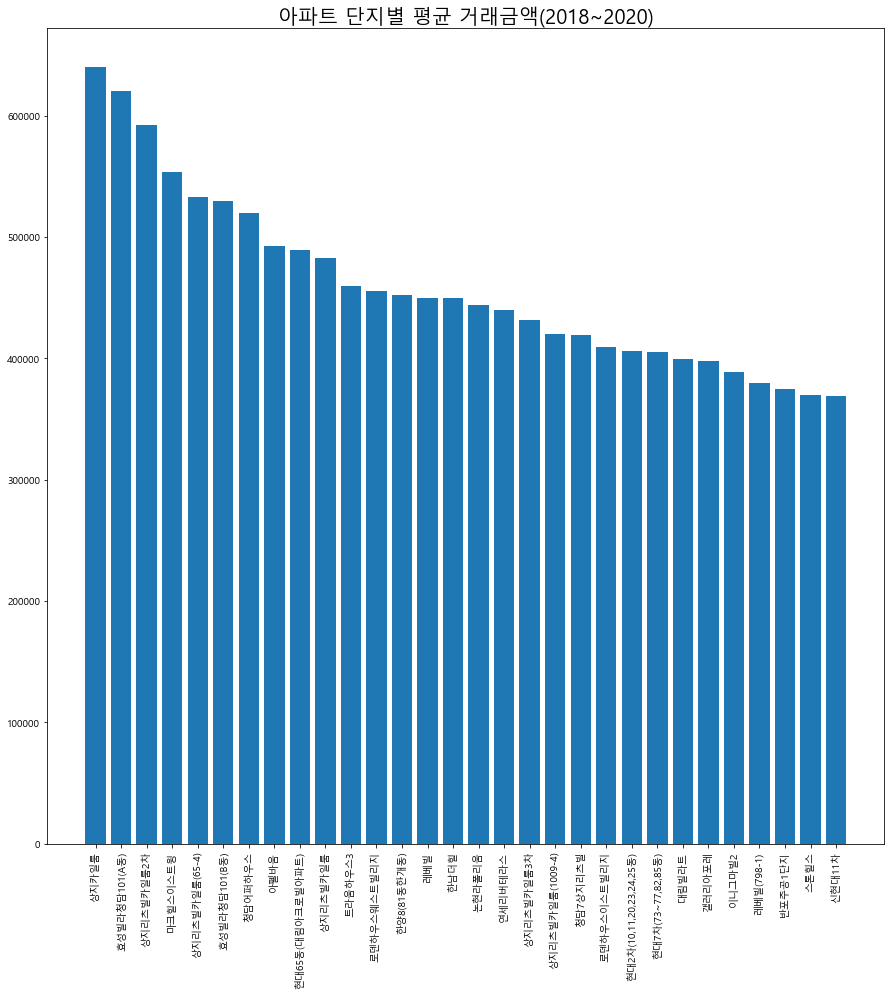

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

fl = fm.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font', family=fl)

plt.figure(figsize=(15, 15))

# 상위 30개의 거래금액 가격을 지닌 아파트 단지
train_data_by_danji_top30 = train_data_by_danji.sort_values('거래금액(만원)', ascending=False)[:30]
plt.bar(train_data_by_danji_top30.index, train_data_by_danji_top30['거래금액(만원)'])

plt.title('아파트 단지별 평균 거래금액(2018~2020)', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [10]:
#  단지 별 계약 연도 별 그룹바이 수행 후 단지 별 내 계약 연도 내 거래금액 평균가격 도출
train_data_by_danji_top30

,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
단지명,,,,,
상지카일룸,244.980000,201806.000000,640000.000000,13.000000,2003.0
효성빌라청담101(A동),226.740000,202011.000000,620000.000000,5.000000,2019.0
상지리츠빌카일룸2차,244.320000,201830.500000,592500.000000,7.500000,2006.0
마크힐스이스트윙,192.860000,201808.000000,553333.333333,14.000000,2010.0
상지리츠빌카일룸(65-4),237.740000,201907.000000,533000.000000,2.000000,2012.0
효성빌라청담101(B동),226.740000,201905.000000,530000.000000,3.000000,2019.0
청담어퍼하우스,199.702500,202006.750000,519500.000000,3.750000,2019.0
아펠바움,241.830000,201906.000000,492166.666667,12.333333,2008.0
현대65동(대림아크로빌아파트),243.230000,201906.000000,489000.000000,12.000000,1979.0


### 1.3 주요 아파트 시공사 별 평균 거래금액

In [11]:
# 아파트 별 몇 채 있는지 탐색, 같은 아파트 이름 갖는 수 저장
# column => 아파트 별 집 개수
train_data['아파트 별 집 개수'] = 0
train_data_apt_count = train_data.groupby('단지명')['아파트 별 집 개수'].count()

train_data = pd.merge(train_data, train_data_apt_count, on='단지명', how='left')
train_data = train_data.drop('아파트 별 집 개수_x', axis=1).rename(columns={'아파트 별 집 개수_y':'아파트 별 집 개수'})

train_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,아파트 별 집 개수
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,26
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,26
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,26
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,26
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,26
...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,5
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,4
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,4
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,3


In [12]:
# top10 시공사 + 데이터에서 가장 많이 나오는 아파트 20개의 이름을 통일
# top 10 시공사 아파트 여부를 나타내는 컬럼 생성
train_data['top10'] = 0
top10_apt = ['힐스테이트', '자이', '롯데캐슬', '더샵', '푸르지오', 
            '래미안', '아이파크', 'sk|SK|에스케이', '이편한|e편한|e-편한', '더 플래티넘']

# top 10 시공사에 속해 있는 아파트면 1, 아니면 0
for i, brand in enumerate(top10_apt):
    train_data.loc[train_data['단지명'].str.contains(brand), 'top10'] = 1

# top10 시공사에 속하는 아파트 단지 탐색
train_data[train_data['top10'] == 1]

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,아파트 별 집 개수,top10
17,서울특별시 강남구 개포동,개포자이(12-2),170.3200,201801,162000,16,2004,개포로109길 69,25,1
18,서울특별시 강남구 개포동,개포자이(12-2),134.3000,201801,153500,3,2004,개포로109길 69,25,1
19,서울특별시 강남구 개포동,개포자이(12-2),170.3200,201801,175000,15,2004,개포로109길 69,25,1
20,서울특별시 강남구 개포동,개포자이(12-2),134.3000,201803,158000,18,2004,개포로109길 69,25,1
21,서울특별시 강남구 개포동,개포자이(12-2),168.4200,201804,171000,5,2004,개포로109길 69,25,1
...,...,...,...,...,...,...,...,...,...,...
239380,서울특별시 중랑구 묵동,현대아이파크,84.9416,202009,77000,7,2002,중랑천로 286,114,1
239381,서울특별시 중랑구 묵동,현대아이파크,84.9416,202010,70000,1,2002,중랑천로 286,114,1
239382,서울특별시 중랑구 묵동,현대아이파크,84.9785,202010,78500,5,2002,중랑천로 286,114,1
239383,서울특별시 중랑구 묵동,현대아이파크,84.9785,202010,78500,5,2002,중랑천로 286,114,1


In [13]:
# 겹치는 아파트 이름 탐색
# 데이터에 존재하는 상위 20개 아파트
apt_top20 = train_data['단지명'].value_counts()[:20]
top20_apt = list(apt_top20.index)

# top10 시공사 + 기존 데이터에 존재하는 상위 20개 아파트 단지 키워드 리스트 합성
total_top_apt = top10_apt + top20_apt

# total_top_apt 의 키워드에 해당하는 아파트명이 있는지 여부를 나타내는 새로운 컬럼 생성
# top30 키워드에 속하지 않은 아파트는 others로 분류
train_data['top30'] = 'others'

for apt_name in total_top_apt:
    train_data.loc[train_data['단지명'].str.contains(apt_name), 'top30'] = apt_name

# 통합 상위 30개 아파트 단지명에 대한 각각의 속성 개수 탐색
train_data['top30'].value_counts()

others          133430
현대               18675
래미안              10568
삼성                8106
동아                7153
우성                6103
푸르지오              5566
한신                5354
두산                5181
힐스테이트             5008
벽산                4626
자이                4211
롯데캐슬              3928
이편한|e편한|e-편한      3460
대우                2584
아이파크              2421
쌍용                2412
극동                2169
주공2               1713
sk|SK|에스케이        1434
중앙하이츠             1373
더샵                1142
대림e-편한세상          1019
에스케이북한산시티          939
파크리오               911
신동아아파트1            739
중계그린1단지            696
Name: top30, dtype: int64

In [14]:
# 단지명에 상위 30개 아파트 군에 속하는 거래금액 도출 및 시각화
train_data_top30_apt = train_data[train_data['top30'] != 'others']
train_data_top30_by_apt = train_data_top30_apt.groupby('top30').mean()
train_data_top30_by_apt['거래금액(만원)']

top30
sk|SK|에스케이       75505.575314
극동               71921.678654
대림e-편한세상         83480.117763
대우               67783.424149
더샵              126580.551664
동아               73591.333147
두산               63158.108859
래미안             114160.671650
롯데캐슬            107670.102342
벽산               51715.343709
삼성               85070.955959
신동아아파트1          30162.182679
쌍용               76014.265340
아이파크            114141.009913
에스케이북한산시티        52068.924388
우성               78820.868753
이편한|e편한|e-편한     96553.041618
자이              128949.995013
주공2              39859.612960
중계그린1단지          36170.163793
중앙하이츠            61087.513474
파크리오            157247.091109
푸르지오             85126.000719
한신               63342.387000
현대               80762.798661
힐스테이트            88930.139776
Name: 거래금액(만원), dtype: float64

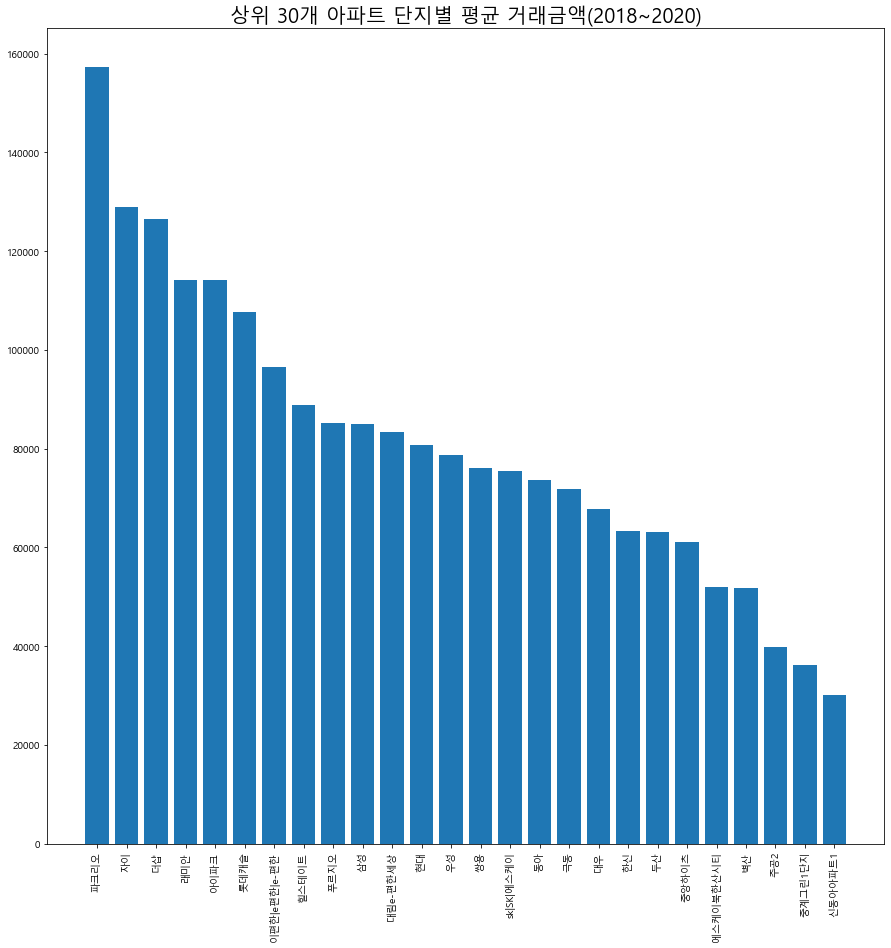

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

fl = fm.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font', family=fl)

plt.figure(figsize=(15, 15))

# 상위 30개의 거래금액 가격을 지닌 아파트 단지
train_data_sorted_by_top30 = train_data_top30_by_apt.sort_values('거래금액(만원)', ascending=False)
plt.bar(train_data_sorted_by_top30.index, train_data_sorted_by_top30['거래금액(만원)'])

plt.title('상위 30개 아파트 단지별 평균 거래금액(2018~2020)', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [16]:
train_data_sorted_by_top30['거래금액(만원)']

top30
파크리오            157247.091109
자이              128949.995013
더샵              126580.551664
래미안             114160.671650
아이파크            114141.009913
롯데캐슬            107670.102342
이편한|e편한|e-편한     96553.041618
힐스테이트            88930.139776
푸르지오             85126.000719
삼성               85070.955959
대림e-편한세상         83480.117763
현대               80762.798661
우성               78820.868753
쌍용               76014.265340
sk|SK|에스케이       75505.575314
동아               73591.333147
극동               71921.678654
대우               67783.424149
한신               63342.387000
두산               63158.108859
중앙하이츠            61087.513474
에스케이북한산시티        52068.924388
벽산               51715.343709
주공2              39859.612960
중계그린1단지          36170.163793
신동아아파트1          30162.182679
Name: 거래금액(만원), dtype: float64

In [17]:
# 단지명에 상위 30개 아파트 군에 속하는 행 개수 count 도출 및 시각화

train_data_top30_apt = train_data[train_data['top30'] != 'others']
train_data_top30_by_apt_count = train_data_top30_apt.groupby('top30').count()
train_data_by_apt_count = train_data_top30_by_apt_count['top10']
train_data_by_apt_count

top30
sk|SK|에스케이       1434
극동               2169
대림e-편한세상         1019
대우               2584
더샵               1142
동아               7153
두산               5181
래미안             10568
롯데캐슬             3928
벽산               4626
삼성               8106
신동아아파트1           739
쌍용               2412
아이파크             2421
에스케이북한산시티         939
우성               6103
이편한|e편한|e-편한     3460
자이               4211
주공2              1713
중계그린1단지           696
중앙하이츠            1373
파크리오              911
푸르지오             5566
한신               5354
현대              18675
힐스테이트            5008
Name: top10, dtype: int64

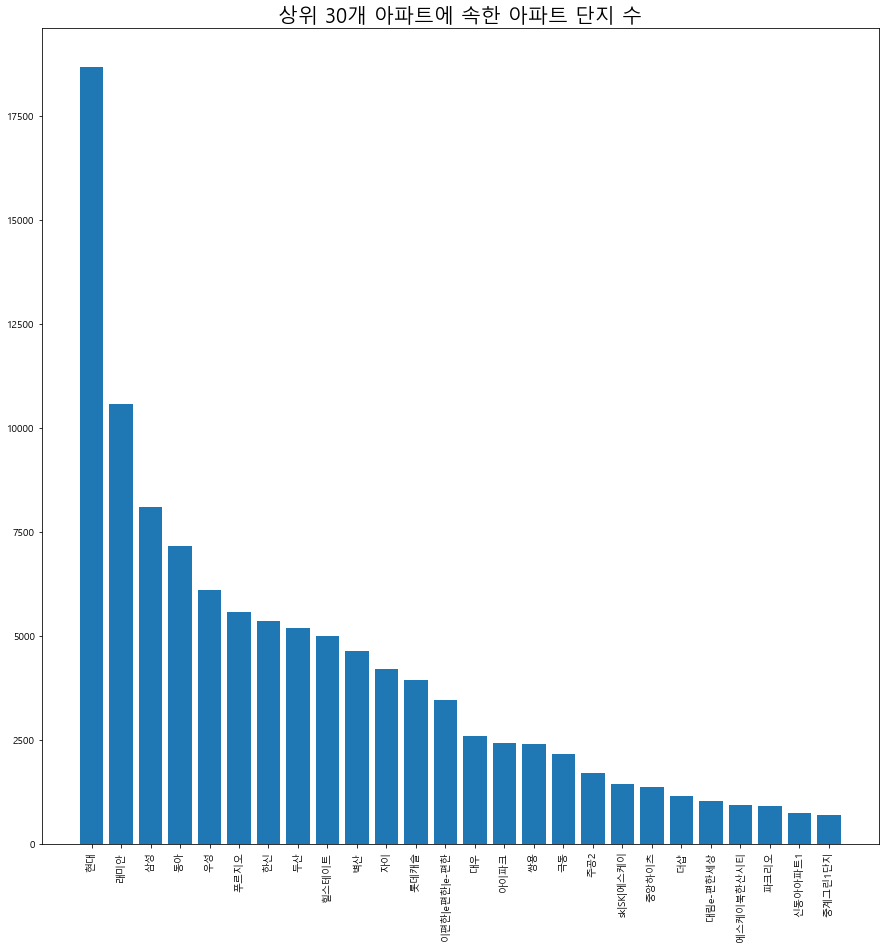

In [18]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

fl = fm.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font', family=fl)

plt.figure(figsize=(15, 15))

# 상위 30개의 거래금액 가격을 지닌 아파트 단지 수 정렬
train_data_sorted_by_top30_count = train_data_by_apt_count.sort_values(ascending=False)

plt.bar(train_data_sorted_by_top30_count.index, train_data_sorted_by_top30_count.values)

plt.xticks(rotation=90)
plt.title('상위 30개 아파트에 속한 아파트 단지 수', fontsize=20)
plt.show()

In [19]:
train_data_sorted_by_top30_count

top30
현대              18675
래미안             10568
삼성               8106
동아               7153
우성               6103
푸르지오             5566
한신               5354
두산               5181
힐스테이트            5008
벽산               4626
자이               4211
롯데캐슬             3928
이편한|e편한|e-편한     3460
대우               2584
아이파크             2421
쌍용               2412
극동               2169
주공2              1713
sk|SK|에스케이       1434
중앙하이츠            1373
더샵               1142
대림e-편한세상         1019
에스케이북한산시티         939
파크리오              911
신동아아파트1           739
중계그린1단지           696
Name: top10, dtype: int64

In [20]:
train_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,아파트 별 집 개수,top10,top30
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,26,0,우성
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,26,0,우성
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,26,0,우성
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,26,0,우성
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,26,0,우성
...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,5,0,others
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,4,0,현대
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,4,0,현대
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,3,0,현대


In [29]:
# 아파트 단지 상위 30개에 대한 연도별 거래금액 및 단지 수 탐색
# 계약년월 컬럼에서 계약
year_splited = train_data['계약년월'].astype(str).str[:4]
year_splited.name = '계약연도'
year_refined_data = pd.concat([train_data, year_splited], axis=1)
year_refined_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,아파트 별 집 개수,top10,top30,계약연도
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,26,0,우성,2018
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,26,0,우성,2018
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,26,0,우성,2018
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,26,0,우성,2018
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,26,0,우성,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,5,0,others,2020
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,4,0,현대,2020
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,4,0,현대,2020
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,3,0,현대,2020


In [31]:
year_refined_data_by_apt_year = year_refined_data[year_refined_data['top30'] != 'others'].groupby(['top30', '계약연도']).count()
year_refined_data_by_apt_year

시군구   단지명  전용면적(㎡)  계약년월  거래금액(만원)     층  건축년도   도로명  \
top30      계약연도                                                          
sk|SK|에스케이 2018   501   501      501   501       501   501   501   501   
           2019   445   445      445   445       445   445   445   445   
           2020   488   488      488   488       488   488   488   488   
극동         2018   719   719      719   719       719   719   719   719   
           2019   723   723      723   723       723   723   723   723   
...               ...   ...      ...   ...       ...   ...   ...   ...   
현대         2019  5924  5924     5924  5924      5924  5924  5924  5924   
           2020  6362  6362     6362  6362      6362  6362  6362  6362   
힐스테이트      2018  1746  1746     1746  1746      1746  1746  1746  1746   
           2019  1523  1523     1523  1523      1523  1523  1523  1523   
           2020  1739  1739     1739  1739      1739  1739  1739  1739   

                 아파트 별 집 개수  top10  
top30      계약연도                     
sk|SK|에스케이 2018         501    501  
           2019         445    445  
           2020         488    488  
극동         2018         719    719  
           2019         723    723  
...                     ...    ...  
현대         2019        5924   5924  
           2020        6362   6362  
힐스테이트      2018        1746   1746  
           2019        1523   1523  
           2020        1739   1739  

[78 rows x 10 columns]

In [ ]:
# 1. 차트 시각화 by 상위 30개 시공사, 연도
# 2. 그룹바이에 대한 개수 뿐만 아니라 평균 거래금액도 도출 및 시각화
# 3. 생성한 top30 컬럼에 대한 레이블 인코딩 및 가중치 처리 수행